# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

1. Applicants that apply for a lower loan amount
2. Applicants that are married
3. Applicants with 0 dependents

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv(r"C:\Users\Dimitri Salavaci\Downloads\data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [4]:
df.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



1.

In [5]:
df['Credit_History'].value_counts(ascending=True)

0.0     89
1.0    475
Name: Credit_History, dtype: int64

2.

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them. Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [6]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [7]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [8]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [9]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [10]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [11]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



<AxesSubplot:>

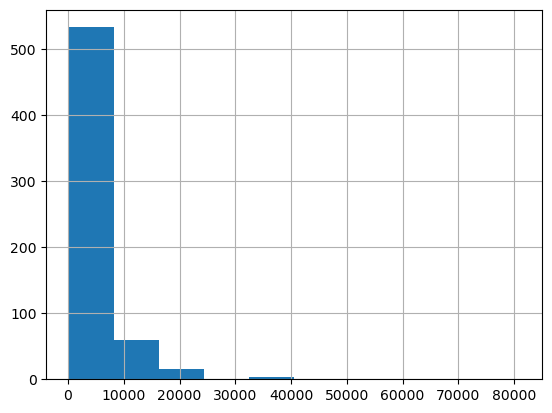

In [12]:
df['ApplicantIncome'].hist()

<AxesSubplot:>

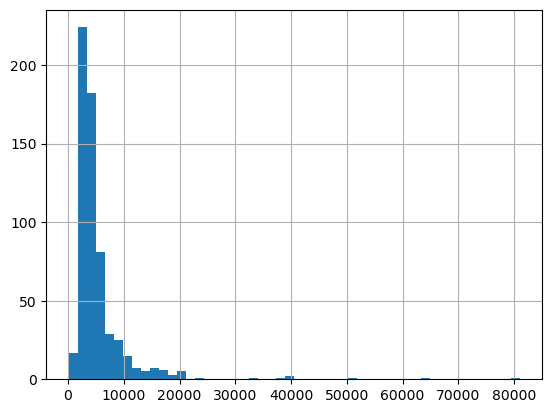

In [13]:
df['ApplicantIncome'].hist(bins=50)

<AxesSubplot:>

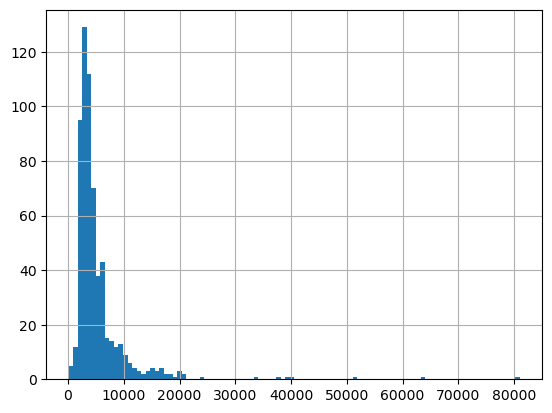

In [14]:
df['ApplicantIncome'].hist(bins=100)

<AxesSubplot:>

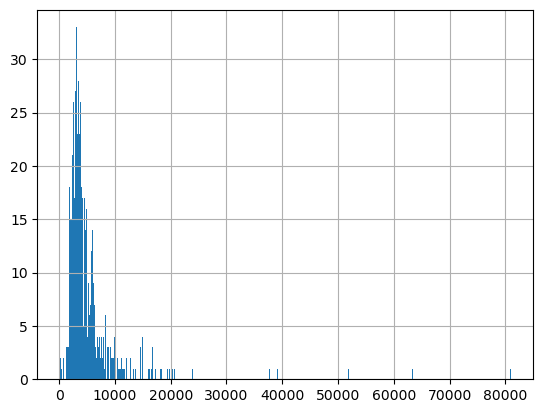

In [15]:
df['ApplicantIncome'].hist(bins=500)


Look at box plots to understand the distributions. 

<AxesSubplot:>

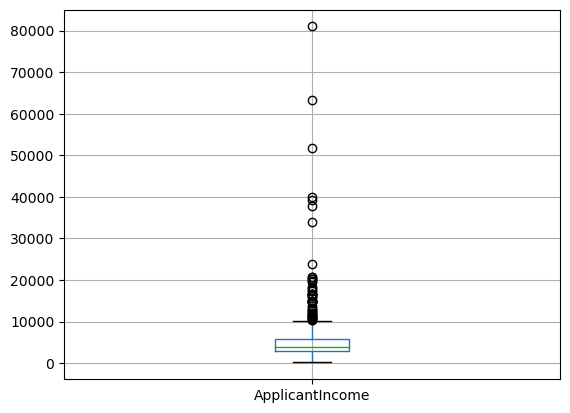

In [16]:
# Boxplot for variable ApplicantIncome 

df.boxplot(column='ApplicantIncome')

Look at the distribution of income segregated  by `Education`

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

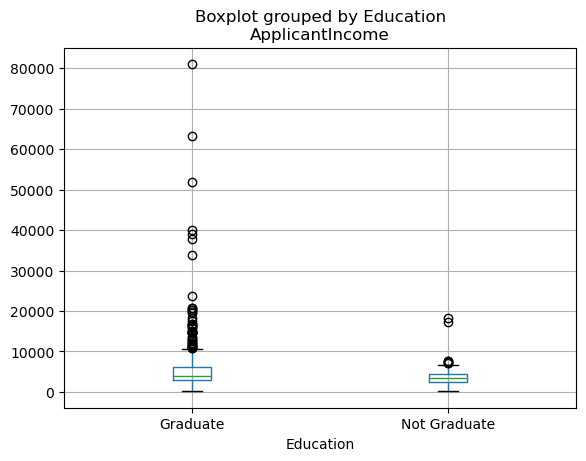

In [17]:
# Boxplot for variable ApplicantIncome by variable Education 

df.boxplot(column='ApplicantIncome', by = 'Education')

- We can see that there isn't a massive difference between the average income of graduate and non-graduates. However there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:>

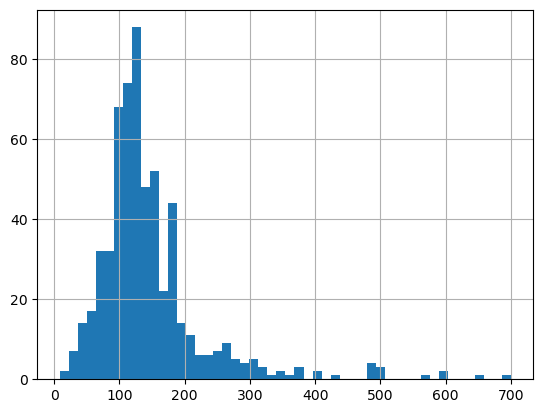

In [18]:
#histogram of LoanAmount

df['LoanAmount'].hist(bins=50)

<AxesSubplot:>

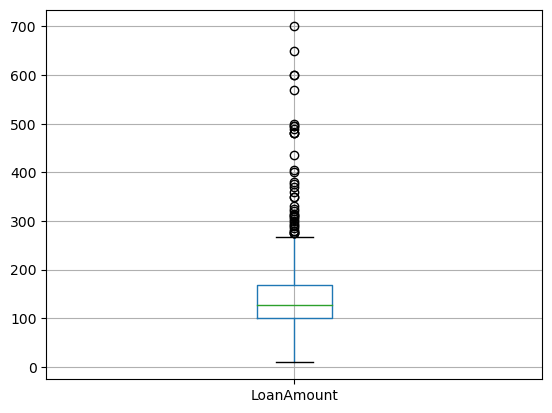

In [19]:
#Boxplot of LoanAmount

df.boxplot(column='LoanAmount')

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

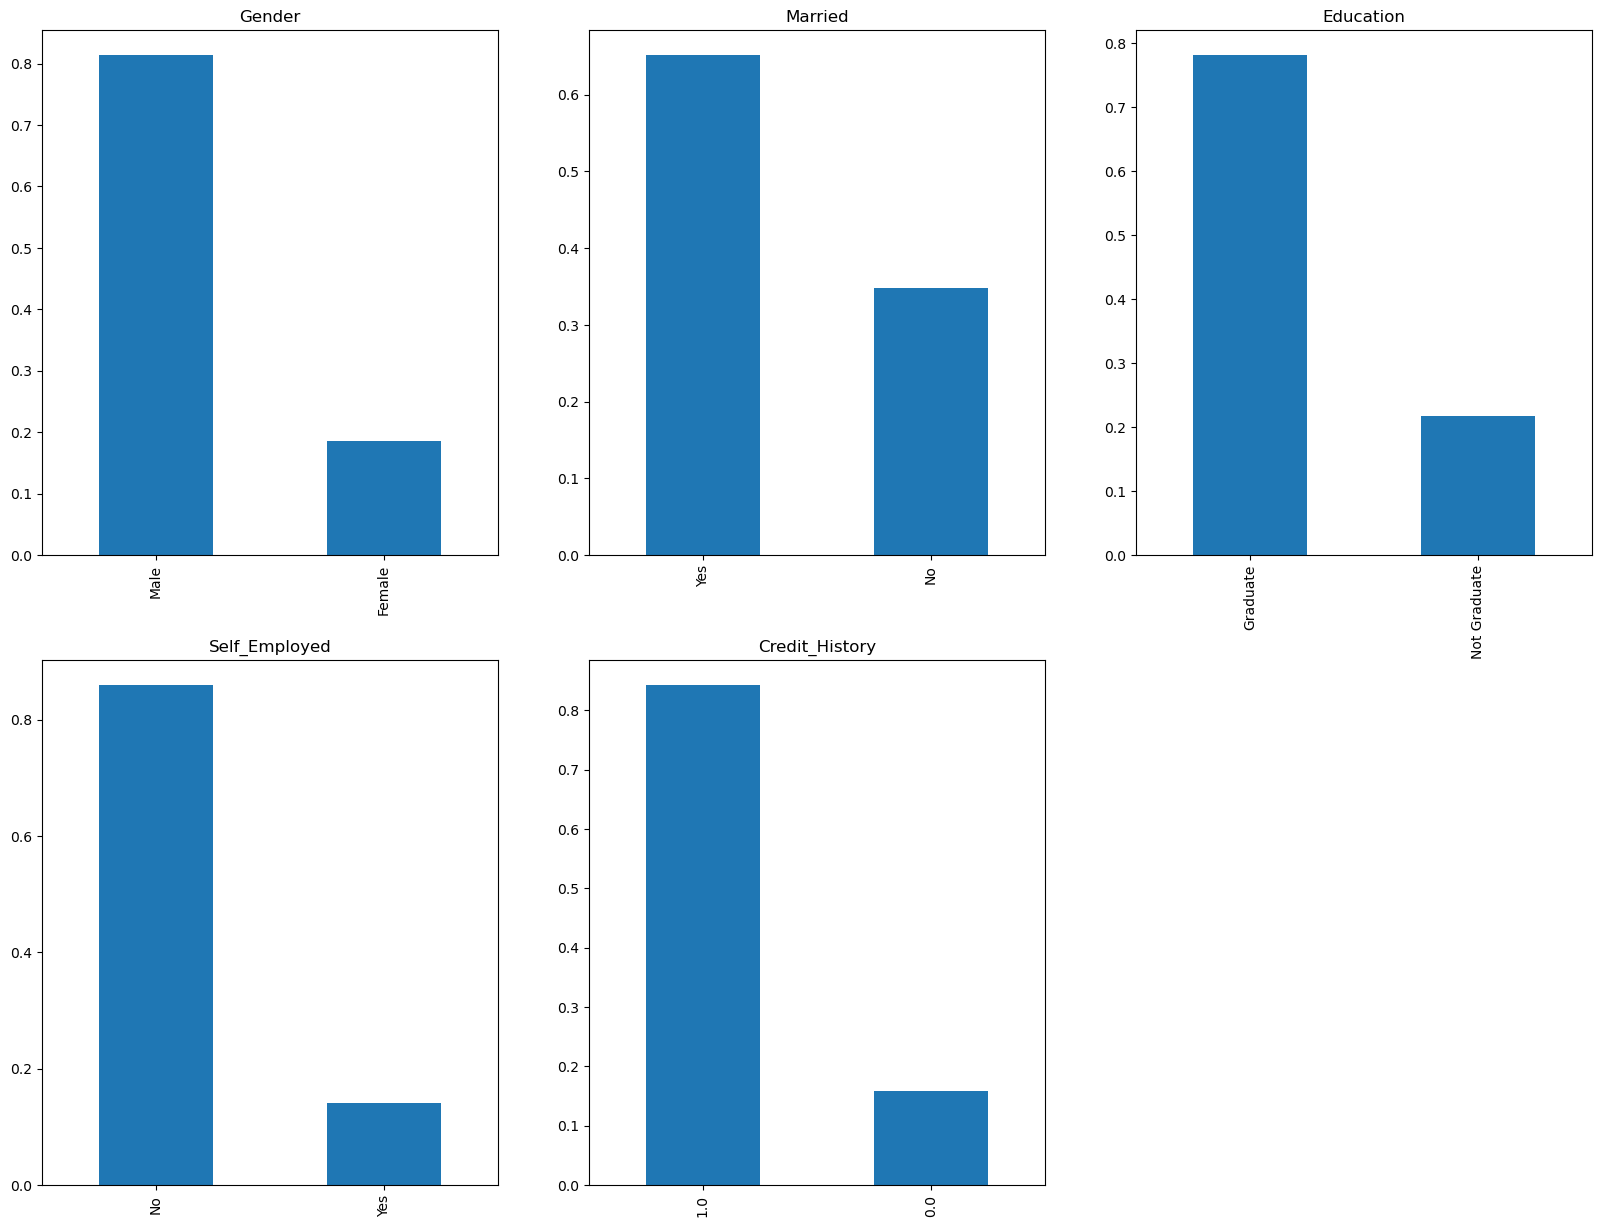

In [20]:
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,15), title= 'Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(234)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(235)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')


plt.show()

In [21]:
df['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [22]:
df['Married'].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [23]:
df['Education'].value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [24]:
df['Self_Employed'].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [25]:
df['Credit_History'].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

### Based on the bar plots above, we can say that: 

- About 80% applicants in the dataset are male.
- About 65% of the applicants in the dataset are married.
- About 80% of the applicants are graduates.
- About 15% applicants in the dataset are self employed.
- About 85% applicants have credit history.

<AxesSubplot:>

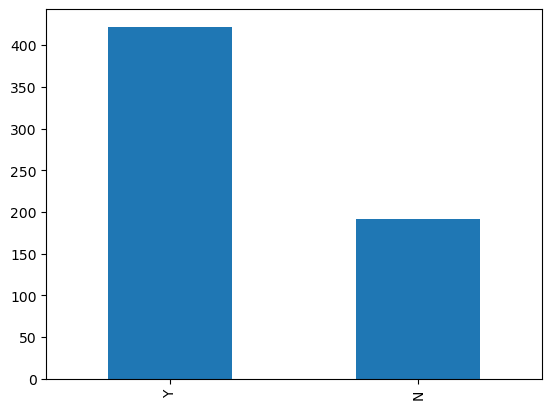

In [26]:
df['Loan_Status'].value_counts().plot.bar()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [27]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [28]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
# Add missing values for Gender

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [30]:
# Add missing values for Married

df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [31]:
# Add missing values for Dependents

df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [32]:
# Replace missing value of Self_Employed with most frequent answer

df['Self_Employed'].fillna('No',inplace=True)

In [33]:
# Add missing values for LoanAmount

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [34]:
# Add missing values for Loan_Amount_Term

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [35]:
# Add missing values for Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [36]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
# Replacing 3+ in Dependents variable with 3

df['Dependents'].replace('3+', 3, inplace=True)

In [38]:
# replacing Y and N in Loan_Status variable with 1 and 0

df['Loan_Status'].replace('N', 0, inplace=True)
df['Loan_Status'].replace('Y', 1, inplace=True)

In [39]:
# replacing Male and Female in Gender variable with 1 and 0

df['Gender'].replace('Female', 0, inplace=True)
df['Gender'].replace('Male', 1, inplace=True)

In [40]:
# replacing Yes and No in Married variable with 1 and 0

df['Married'].replace('No', 0, inplace=True)
df['Married'].replace('Yes', 1, inplace=True)

In [41]:
# replacing Graduate and Not Graduate in Education variable with 1 and 0

df['Education'].replace('Not Graduate', 0, inplace=True)
df['Education'].replace('Graduate', 1, inplace=True)

In [42]:
# replacing Yes and No in Self_Employed variable with 1 and 0

df['Self_Employed'].replace('No', 0, inplace=True)
df['Self_Employed'].replace('Yes', 1, inplace=True)

In [43]:
# replacing Urban, Semiurban and Rural in Property_Area variable with 2, 1 and 0

df['Property_Area'].replace('Rural', 0, inplace=True)
df['Property_Area'].replace('Semiurban', 1, inplace=True)
df['Property_Area'].replace('Urban', 2, inplace=True)

In [44]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

<AxesSubplot:>

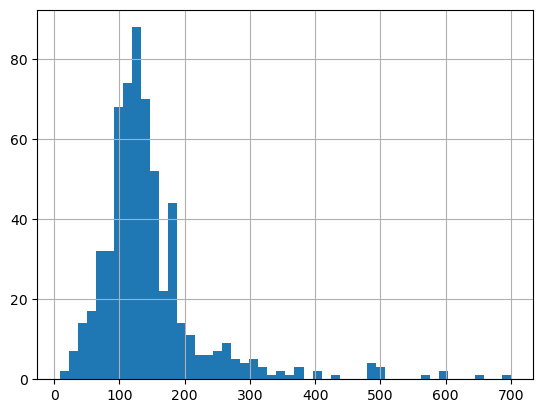

In [45]:
df['LoanAmount'].hist(bins=50)

In [46]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

<AxesSubplot:>

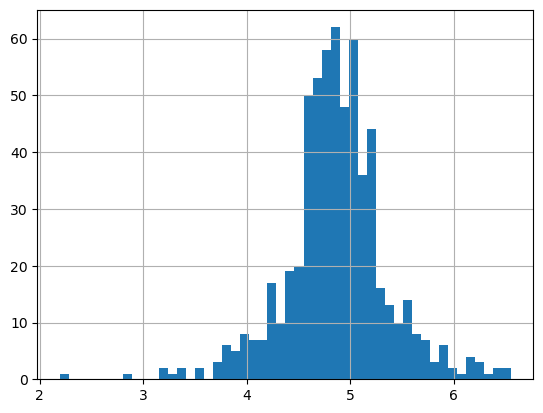

In [47]:
df['LoanAmount_log'].hist(bins=50)

Combine both incomes as total income and take a log transformation of the same.

In [48]:
df['TotalIncome']=df['ApplicantIncome'] + df['CoapplicantIncome']

In [49]:
df['TotalIncome_log'] = np.log(df['TotalIncome'])

<AxesSubplot:>

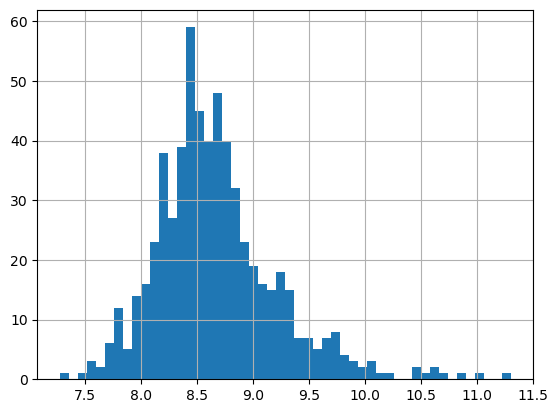

In [50]:
#Histogram for Total Income
df['TotalIncome_log'].hist(bins=50) 

## 4. Building a Predictive Model

In [51]:
update_df = df.drop('Loan_ID', axis=1)

In [52]:
update_df2 = update_df.drop('ApplicantIncome', axis=1)

In [53]:
new_df = update_df2.drop('CoapplicantIncome', axis=1)
new_df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,1,0,0,1,0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,1,1,1,1,0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,1,1,0,1,1,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,1,1,0,0,0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,1,0,0,1,0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466
610,1,1,3,1,0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205
611,1,1,1,1,0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456
612,1,1,2,1,0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664


In [54]:
# Split into train and test sets
train_size = int(len(new_df) * 0.8)
train = new_df[:train_size]
test = new_df[train_size:]

In [55]:
# Save the new datasets
train.to_csv(r"C:\Users\Dimitri Salavaci\Downloads\train.csv", index=False)
test.to_csv(r"C:\Users\Dimitri Salavaci\Downloads\test.csv", index=False)

In [56]:
# Load the train and test datasets

train_df = pd.read_csv(r"C:\Users\Dimitri Salavaci\Downloads\train.csv")
test_df = pd.read_csv(r"C:\Users\Dimitri Salavaci\Downloads\test.csv")

In [57]:
# Separate the target variable from the input features
X_train = train_df.drop('Loan_Status', axis=1)
y_train = train_df['Loan_Status']
X_test = test_df.drop('Loan_Status', axis=1)
y_test = test_df['Loan_Status']

In [83]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [107]:
pca = PCA(n_components=5)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)

In [108]:
model = LogisticRegression()
model.fit(X_train_pca, y_train)

LogisticRegression()

In [109]:
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

In [110]:
y_pred = model.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')

Test set accuracy: 0.8048780487804879


In [111]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

Try paramater grid search to improve the results

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [90]:
logreg = LogisticRegression()
new_model = GridSearchCV(logreg,                    
                   param_grid = parameters,   
                   scoring='accuracy',        
                   cv=10)                    

In [91]:
new_model.fit(X_train,y_train)

c:\Users\Dimitri Salavaci\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Dimitri Salavaci\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Dimitri Salavaci\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Dimitri Salavaci\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Dimitri Salavaci\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [92]:
print("Tuned Hyperparameters :", new_model.best_params_)
print("Accuracy :",new_model.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.8044897959183673


In [93]:
logreg = LogisticRegression(C = 1.0, 
                            penalty = 'l2', 
                            solver = 'newton-cg')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",logreg.score(X_test, y_test))

Accuracy: 0.8211382113821138


c:\Users\Dimitri Salavaci\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Dimitri Salavaci\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Dimitri Salavaci\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Dimitri Salavaci\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Dimitri Salavaci\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: 

In [112]:
# save the model to disk
filename2 = 'finalized_model.sav'
pickle.dump(logreg, open(filename2, 'wb'))

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [77]:
from sklearn.pipeline import Pipeline

In [82]:
pipeline = Pipeline(steps=[('scaling', StandardScaler()),
                           ('pca', PCA(n_components=3)),
                           ('classifier', LogisticRegression())])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')

Test set accuracy: 0.6991869918699187


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python